In [4]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [6]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [7]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = 1000, test_split=0.2)

In [8]:
category = np.max(Y_train) + 1
print(category)
print(len(X_train))
print(len(X_test))
print(X_train[0])

46
8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [11]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [12]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                   validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 37s 4ms/step - loss: 2.6147 - acc: 0.3442 - val_loss: 2.4222 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 36s 4ms/step - loss: 2.3039 - acc: 0.3901 - val_loss: 2.0308 - val_acc: 0.5058
Epoch 3/20
8982/8982 [==============================] - 41s 5ms/step - loss: 1.9062 - acc: 0.5136 - val_loss: 1.7961 - val_acc: 0.5414
Epoch 4/20
8982/8982 [==============================] - 42s 5ms/step - loss: 1.7397 - acc: 0.5517 - val_loss: 1.7626 - val_acc: 0.5534
Epoch 5/20
8982/8982 [==============================] - 45s 5ms/step - loss: 1.6638 - acc: 0.5750 - val_loss: 1.6984 - val_acc: 0.5668
Epoch 6/20
8982/8982 [==============================] - 43s 5ms/step - loss: 1.6067 - acc: 0.5863 - val_loss: 1.6575 - val_acc: 0.5801
Epoch 7/20
8982/8982 [==============================] - 35s 4ms/step - loss: 1.5504 - acc: 0.6114 - val_loss: 1.5874 - val_acc: 0.6118
Epoch 8

In [16]:
print("Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 3s 1ms/step
Accuracy : 0.7182


In [17]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

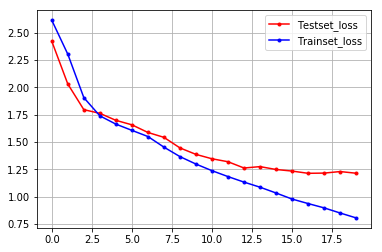

In [21]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', 
        c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', 
        c="blue", label="Trainset_loss")
plt.legend(loc='upper right')
plt.grid()
plt.show()